In [332]:
 #pip install dash

Note: you may need to restart the kernel to use updated packages.


In [333]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#color_pal = sns.color_palette()
#plt.style.use('fivethirtyeight')

In [76]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Data Reading 

In [77]:
df=pd.read_excel("D:\\GDP\\Needed data For GDP prediction - 18-10-2022.xlsx",sheet_name='Data')
df

Time Frame       Date  \
0     الربع الأول 2002/2001 2001-09-30   
1    الربع الثاني 2002/2001 2001-12-31   
2    الربع الثالث 2002/2001 2002-03-31   
3    الربع الرابع 2002/2001 2002-06-30   
4     الربع الأول 2003/2002 2002-09-30   
..                      ...        ...   
80    الربع الأول 2022/2021 2021-09-30   
81   الربع الثاتي 2022/2021 2021-12-31   
82   الربع الثالث 2022/2021 2022-03-31   
83  الربع الراابع 2021/2022 2022-06-30   
84    الربع الأول 2022/2023 2022-09-30   

    Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
80                                                NaN                       
81                                                NaN                       
82                                                NaN                       
83                                                NaN                       
84                                                NaN                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
80                                                NaN                           
81                                                NaN                           
82                                                NaN                           
83                                                NaN                           
84                                                NaN                           

    Exports of goods and services (L.E B.)   \
0                                     76.91   
1                                     78.82   
2                                     91.36   
3                                     91.96   
4                                     91.62   
..                                      ...   
80                                      NaN   
81                                      NaN   
82                                      NaN   
83                                      NaN   
84                                      NaN   

    Imports of goods and services (L.E B.)   \
0                                     97.57   
1                                    103.14   
2                                    105.97   
3                                    112.17   
4                                    114.42   
..                                      ...   
80                                      NaN   
81                                      NaN   
82                                      NaN   
83                                      NaN   
84                                      NaN   

    GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)  \
0                                              438.61                                               
1                                              454.41                                               
2                                              486.53                                               
3                                              467.38                           

# Replace '-' by non

In [78]:
df.replace(to_replace='-',value=np.nan,inplace=True)
df

Time Frame       Date  \
0     الربع الأول 2002/2001 2001-09-30   
1    الربع الثاني 2002/2001 2001-12-31   
2    الربع الثالث 2002/2001 2002-03-31   
3    الربع الرابع 2002/2001 2002-06-30   
4     الربع الأول 2003/2002 2002-09-30   
..                      ...        ...   
80    الربع الأول 2022/2021 2021-09-30   
81   الربع الثاتي 2022/2021 2021-12-31   
82   الربع الثالث 2022/2021 2022-03-31   
83  الربع الراابع 2021/2022 2022-06-30   
84    الربع الأول 2022/2023 2022-09-30   

    Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
80                                                NaN                       
81                                                NaN                       
82                                                NaN                       
83                                                NaN                       
84                                                NaN                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
80                                                NaN                           
81                                                NaN                           
82                                                NaN                           
83                                                NaN                           
84                                                NaN                           

    Exports of goods and services (L.E B.)   \
0                                     76.91   
1                                     78.82   
2                                     91.36   
3                                     91.96   
4                                     91.62   
..                                      ...   
80                                      NaN   
81                                      NaN   
82                                      NaN   
83                                      NaN   
84                                      NaN   

    Imports of goods and services (L.E B.)   \
0                                     97.57   
1                                    103.14   
2                                    105.97   
3                                    112.17   
4                                    114.42   
..                                      ...   
80                                      NaN   
81                                      NaN   
82                                      NaN   
83                                      NaN   
84                                      NaN   

    GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)  \
0                                              438.61                                               
1                                              454.41                                               
2                                              486.53                                               
3                                              467.38                           

# Descriptive analysis

In [79]:
df.describe()

Total Final consumption at market prices & constant  prices (L.E B.)   \
count                                          80.000000                       
mean                                          652.868625                       
std                                           185.598438                       
min                                           379.210000                       
25%                                           481.130000                       
50%                                           641.240000                       
75%                                           794.445000                       
max                                          1033.500000                       

       Total investment and stock  at market prices & constant  prices (L.E B.)   \
count                                          80.000000                           
mean                                          119.705250                           
std                                            32.854323                           
min                                            59.740000                           
25%                                            92.610000                           
50%                                           118.520000                           
75%                                           142.795000                           
max                                           193.700000                           

       Exports of goods and services (L.E B.)   \
count                                80.000000   
mean                                140.264500   
std                                  37.084263   
min                                  76.910000   
25%                                 108.322500   
50%                                 147.355000   
75%                                 165.550000   
max                                 233.610000   

       Imports of goods and services (L.E B.)   \
count                                80.000000   
mean                                190.241000   
std                                  49.020435   
min                                  97.570000   
25%                                 161.412500   
50%                                 183.215000   
75%                                 218.470000   
max                                 309.000000   

       GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)  \
count                                          80.000000                                               
mean                                          722.597625                                               
std                                           174.005074                                               
min                                           438.610000                                               
25%                                           577.620000                                               
50%                                           722.365000                                               
75%                                           843.162500                                               
max                                          1066.300000                                               

       GDP Per Capita (000 $)  \
count               42.000000   
mean              9355.700587   
std                512.238962   
min               8523.918530   
25%               8996.094909   
50%               9231.043905   
75%               9727.313506   
max              10464.180569   

       Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
count                                          83.000000               
mean                                           10.100703               
std                                             6.130527               
min                                             2.165570               
25%                             

# Data preprocessing

In [80]:
#df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)
#df

In [81]:
df.isna().sum()

Time Frame                                                                                        0
Date                                                                                              0
Total Final consumption at market prices & constant  prices (L.E B.)                              5
Total investment and stock  at market prices & constant  prices (L.E B.)                          5
Exports of goods and services (L.E B.)                                                            5
Imports of goods and services (L.E B.)                                                            5
GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)     5
GDP Per Capita (000 $)                                                                           43
Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF                                     2
Total Domestic Debt\n(L.E B.)\nCBE                                                                9


In [82]:
df=df.fillna(df.median()) # using median to fill nulls
df.head(80)

Time Frame       Date  \
0    الربع الأول 2002/2001 2001-09-30   
1   الربع الثاني 2002/2001 2001-12-31   
2   الربع الثالث 2002/2001 2002-03-31   
3   الربع الرابع 2002/2001 2002-06-30   
4    الربع الأول 2003/2002 2002-09-30   
..                     ...        ...   
75  الربع الرابع 2020/2019 2020-06-30   
76   الربع الأول 2021/2020 2020-09-30   
77  الربع الثاني 2021/2020 2020-12-31   
78  الربع الثالث 2021/2020 2021-03-31   
79  الربع الرابع 2021/2020 2021-06-30   

    Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
75                                            1018.60                       
76                                             957.60                       
77                                             977.40                       
78                                            1013.60                       
79                                            1033.50                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
75                                              82.60                           
76                                              93.20                           
77                                             119.80                           
78                                             133.10                           
79                                             162.20                           

    Exports of goods and services (L.E B.)   \
0                                     76.91   
1                                     78.82   
2                                     91.36   
3                                     91.96   
4                                     91.62   
..                                      ...   
75                                    85.10   
76                                    97.80   
77                                   106.40   
78                                   146.10   
79                                   130.80   

    Imports of goods and services (L.E B.)   \
0                                     97.57   
1                                    103.14   
2                                    105.97   
3                                    112.17   
4                                    114.42   
..                                      ...   
75                                   196.30   
76                                   166.00   
77                                   179.00   
78                                   238.20   
79                                   260.20   

    GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)  \
0                                              438.61                                               
1                                              454.41                                               
2                                              486.53                                               
3                                              467.38                                      

# EDA

In [83]:
correlation_matrix =df.corr().round(2)
#annot = True to print the values inside the square
sns.set(rc={'figure.figsize':(100,70)})
sns.set(font_scale=10)
sns.heatmap(data=correlation_matrix,annot=True,annot_kws={"size":100})

<AxesSubplot:>

# Drop not needed columns

In [84]:
df.columns

Index(['Time Frame', 'Date',
       'Total Final consumption at market prices & constant  prices (L.E B.) ',
       'Total investment and stock  at market prices & constant  prices (L.E B.) ',
       'Exports of goods and services (L.E B.) ',
       'Imports of goods and services (L.E B.) ',
       'GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)',
       'GDP Per Capita (000 $)',
       'Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF',
       'Total Domestic Debt\n(L.E B.)\nCBE', 'Workers Remittance ($  Million)',
       'Unemployment Rate %', 'GDP Growth Rate ( annual) (%)',
       'Egypt's Purchasing Managers' Index',
       'Global  JP MORGAN PMI: COMPOSITE - S&P Global',
       'Global  JP MORGAN PMI: Manufacturing- S&P Global',
       'Global JP MORGAN PMI: ٍServices - S&P Global'],
      dtype='object')

In [85]:
df.drop(['Date','Time Frame','GDP at cat market prices & constant  prices (L.E B.)\n(Consumption+Investment+Exports-Imorts)',\
        #'GDP Per Capita (000 $)',\
        'Global  JP MORGAN PMI: Manufacturing- S&P Global',\
        'Global JP MORGAN PMI: ٍServices - S&P Global'],axis=1,inplace=True)
df

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
80                                             641.24                       
81                                             641.24                       
82                                             641.24                       
83                                             641.24                       
84                                             641.24                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
80                                             118.52                           
81                                             118.52                           
82                                             118.52                           
83                                             118.52                           
84                                             118.52                           

    Exports of goods and services (L.E B.)   \
0                                    76.910   
1                                    78.820   
2                                    91.360   
3                                    91.960   
4                                    91.620   
..                                      ...   
80                                  147.355   
81                                  147.355   
82                                  147.355   
83                                  147.355   
84                                  147.355   

    Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                    97.570             9231.043905   
1                                   103.140             9231.043905   
2                                   105.970             9231.043905   
3                                   112.170             9231.043905   
4                                   114.420             9231.043905   
..                                      ...                     ...   
80                                  183.215             9231.043905   
81                                  183.215             9231.043905   
82                                  183.215             9231.043905   
83                                  183.215             9231.043905   
84                                  183.215             9231.043905   

    Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                            2.165570               
1                                            2.320502               
2                                            2.603037               
3                                            2.644360               
4                                            2.736786               
..                                                ...               
80                                           5.891552               
81                                           5.887123               
82                                           8.849226              

# Data preprocessing

In [86]:
df

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
80                                             641.24                       
81                                             641.24                       
82                                             641.24                       
83                                             641.24                       
84                                             641.24                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
80                                             118.52                           
81                                             118.52                           
82                                             118.52                           
83                                             118.52                           
84                                             118.52                           

    Exports of goods and services (L.E B.)   \
0                                    76.910   
1                                    78.820   
2                                    91.360   
3                                    91.960   
4                                    91.620   
..                                      ...   
80                                  147.355   
81                                  147.355   
82                                  147.355   
83                                  147.355   
84                                  147.355   

    Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                    97.570             9231.043905   
1                                   103.140             9231.043905   
2                                   105.970             9231.043905   
3                                   112.170             9231.043905   
4                                   114.420             9231.043905   
..                                      ...                     ...   
80                                  183.215             9231.043905   
81                                  183.215             9231.043905   
82                                  183.215             9231.043905   
83                                  183.215             9231.043905   
84                                  183.215             9231.043905   

    Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                            2.165570               
1                                            2.320502               
2                                            2.603037               
3                                            2.644360               
4                                            2.736786               
..                                                ...               
80                                           5.891552               
81                                           5.887123               
82                                           8.849226              

In [87]:
# Set Date as index
#df = df.set_index('Date')
#df.index = pd.to_datetime(df.index)
#df

# Scalling

In [88]:
scaler_min_max=MinMaxScaler()
df_min_max=scaler.fit(df)

In [89]:
scaler_min_max = MinMaxScaler()
df_min_max=scaler_min_max.fit_transform(df)
df_min_max=pd.DataFrame(df_min_max,columns=df.columns,index=df.index)
df_min_max

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                            0.012869                       
1                                            0.034618                       
2                                            0.064299                       
3                                            0.005013                       
4                                            0.042611                       
..                                                ...                       
80                                           0.400480                       
81                                           0.400480                       
82                                           0.400480                       
83                                           0.400480                       
84                                           0.400480                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                            0.088832                           
1                                            0.127874                           
2                                            0.150269                           
3                                            0.338609                           
4                                            0.067781                           
..                                                ...                           
80                                           0.438788                           
81                                           0.438788                           
82                                           0.438788                           
83                                           0.438788                           
84                                           0.438788                           

    Exports of goods and services (L.E B.)   \
0                                  0.000000   
1                                  0.012189   
2                                  0.092214   
3                                  0.096043   
4                                  0.093874   
..                                      ...   
80                                 0.449553   
81                                 0.449553   
82                                 0.449553   
83                                 0.449553   
84                                 0.449553   

    Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                  0.000000                0.364448   
1                                  0.026344                0.364448   
2                                  0.039729                0.364448   
3                                  0.069054                0.364448   
4                                  0.079695                0.364448   
..                                      ...                     ...   
80                                 0.405075                0.364448   
81                                 0.405075                0.364448   
82                                 0.405075                0.364448   
83                                 0.405075                0.364448   
84                                 0.405075                0.364448   

    Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                            0.000000               
1                                            0.005168               
2                                            0.014592               
3                                            0.015970               
4                                            0.019053               
..                                                ...               
80                                           0.124281               
81                                           0.124133               
82                                           0.222934              

In [90]:
features = df.columns.values
# define standard scaler
scaler = StandardScaler()
# transform data
scaled_standerd = pd.DataFrame(scaler.fit_transform(df),index=df.index,columns=features)
#scaled_standerd.columns=features
scaled_standerd.head()

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                          -1.478380                       
1                                          -1.398860                       
2                                          -1.290338                       
3                                          -1.507103                       
4                                          -1.369634                       

   Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                          -1.515261                           
1                                          -1.350145                           
2                                          -1.255432                           
3                                          -0.458899                           
4                                          -1.604291                           

   Exports of goods and services (L.E B.)   \
0                                -1.781809   
1                                -1.728443   
2                                -1.378069   
3                                -1.361305   
4                                -1.370804   

   Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                -1.950994                -0.17054   
1                                -1.833204                -0.17054   
2                                -1.773357                -0.17054   
3                                -1.642244                -0.17054   
4                                -1.594663                -0.17054   

   Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                          -1.315559               
1                                          -1.289831               
2                                          -1.242914               
3                                          -1.236051               
4                                          -1.220703               

   Total Domestic Debt\n(L.E B.)\nCBE  Workers Remittance ($  Million)  \
0                           -0.975131                        -1.276437   
1                           -0.973113                        -1.266057   
2                           -0.966565                        -1.320500   
3                           -0.947032                        -1.278471   
4                           -0.935909                        -1.285250   

   Unemployment Rate %  GDP Growth Rate ( annual) (%)  \
0             0.017274                       0.183147   
1             0.017274                       0.183147   
2             0.017274                       0.183147   
3             0.017274                       0.183147   
4             0.017274                      -0.555962   

   Egypt's Purchasing Managers' Index  \
0                            0.165957   
1                            0.165957   
2                            0.165957   
3                            0.165957   
4                            0.165957   

   Global  JP MORGAN PMI: COMPOSITE - S&P Global  
0                                       0.117261  
1                                       0.117261  
2                                       0.117261  
3                                       0.117261  
4                                       0.117261

In [91]:
y_mx=df_min_max['GDP Growth Rate ( annual) (%)']
x_mx=df_min_max.drop(['GDP Growth Rate ( annual) (%)'],axis=1)
x_mx,y_mx

(    Total Final consumption at market prices & constant  prices (L.E B.)   \
 0                                            0.012869                       
 1                                            0.034618                       
 2                                            0.064299                       
 3                                            0.005013                       
 4                                            0.042611                       
 ..                                                ...                       
 80                                           0.400480                       
 81                                           0.400480                       
 82                                           0.400480                       
 83                                           0.400480                       
 84                                           0.400480                       
 
     Total investment and stock  at market prices & constant  

In [92]:
y_sc=scaled_standerd['GDP Growth Rate ( annual) (%)']
x_sc=scaled_standerd.drop(['GDP Growth Rate ( annual) (%)'],axis=1)
x_sc

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                           -1.478380                       
1                                           -1.398860                       
2                                           -1.290338                       
3                                           -1.507103                       
4                                           -1.369634                       
..                                                ...                       
80                                          -0.061160                       
81                                          -0.061160                       
82                                          -0.061160                       
83                                          -0.061160                       
84                                          -0.061160                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                           -1.515261                           
1                                           -1.350145                           
2                                           -1.255432                           
3                                           -0.458899                           
4                                           -1.604291                           
..                                                ...                           
80                                          -0.035218                           
81                                          -0.035218                           
82                                          -0.035218                           
83                                          -0.035218                           
84                                          -0.035218                           

    Exports of goods and services (L.E B.)   \
0                                 -1.781809   
1                                 -1.728443   
2                                 -1.378069   
3                                 -1.361305   
4                                 -1.370804   
..                                      ...   
80                                 0.186458   
81                                 0.186458   
82                                 0.186458   
83                                 0.186458   
84                                 0.186458   

    Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                 -1.950994                -0.17054   
1                                 -1.833204                -0.17054   
2                                 -1.773357                -0.17054   
3                                 -1.642244                -0.17054   
4                                 -1.594663                -0.17054   
..                                      ...                     ...   
80                                -0.139840                -0.17054   
81                                -0.139840                -0.17054   
82                                -0.139840                -0.17054   
83                                -0.139840                -0.17054   
84                                -0.139840                -0.17054   

    Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                           -1.315559               
1                                           -1.289831               
2                                           -1.242914               
3                                           -1.236051               
4                                           -1.220703               
..                                                ...               
80                                          -0.696825               
81                                          -0.697560               
82                                          -0.205676              

In [93]:
y=df['GDP Growth Rate ( annual) (%)']
y

0     4.9
1     4.9
2     4.9
3     4.9
4     3.3
     ... 
80    9.8
81    8.3
82    5.4
83    4.9
84    4.9
Name: GDP Growth Rate ( annual) (%), Length: 85, dtype: float64

In [94]:
y=df['GDP Growth Rate ( annual) (%)']
x=df.drop(['GDP Growth Rate ( annual) (%)'],axis=1)
x

Total Final consumption at market prices & constant  prices (L.E B.)   \
0                                              387.63                       
1                                              401.86                       
2                                              421.28                       
3                                              382.49                       
4                                              407.09                       
..                                                ...                       
80                                             641.24                       
81                                             641.24                       
82                                             641.24                       
83                                             641.24                       
84                                             641.24                       

    Total investment and stock  at market prices & constant  prices (L.E B.)   \
0                                               71.64                           
1                                               76.87                           
2                                               79.87                           
3                                              105.10                           
4                                               68.82                           
..                                                ...                           
80                                             118.52                           
81                                             118.52                           
82                                             118.52                           
83                                             118.52                           
84                                             118.52                           

    Exports of goods and services (L.E B.)   \
0                                    76.910   
1                                    78.820   
2                                    91.360   
3                                    91.960   
4                                    91.620   
..                                      ...   
80                                  147.355   
81                                  147.355   
82                                  147.355   
83                                  147.355   
84                                  147.355   

    Imports of goods and services (L.E B.)   GDP Per Capita (000 $)  \
0                                    97.570             9231.043905   
1                                   103.140             9231.043905   
2                                   105.970             9231.043905   
3                                   112.170             9231.043905   
4                                   114.420             9231.043905   
..                                      ...                     ...   
80                                  183.215             9231.043905   
81                                  183.215             9231.043905   
82                                  183.215             9231.043905   
83                                  183.215             9231.043905   
84                                  183.215             9231.043905   

    Inflation Rate, annually change (%) (Total  Egypt) - IFS, IMF  \
0                                            2.165570               
1                                            2.320502               
2                                            2.603037               
3                                            2.644360               
4                                            2.736786               
..                                                ...               
80                                           5.891552               
81                                           5.887123               
82                                           8.849226              

# Model Selection

In [95]:
X_train_mx, X_test_mx, y_train_mx, y_test_mx = train_test_split(x_mx,y,test_size=0.20,random_state=10,shuffle=True)
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc,y,test_size=0.20,random_state=10,shuffle=True)

In [96]:
regressors = {
    "XGBRegressor": XGBRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "SVR": SVR(),
    "KernelRidge": KernelRidge(),
    "LinearRegression": LinearRegression(),
    'Lasso':Lasso(),
    "Ridge":Ridge(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    'GradientBoostingRegresso': GradientBoostingRegressor()
}

# Cross validation 

In [97]:
df_models = pd.DataFrame(columns=['model','R2_test','R2_train','nrmse_test','nrmse_train'])

for key in regressors:

    print('*',key)

    regressor = regressors[key]
    #model = regressor.fit(X_train_lb,y_train_lb)
    #y_pred = model.predict(X_test)
    
    folds = KFold(n_splits=5,shuffle=True,random_state=10)
    scores = cross_validate(regressor,X_train_mx,y_train_mx,scoring=('r2','neg_root_mean_squared_error',\
                                                                     'neg_mean_absolute_percentage_error',\
                                                                    'neg_mean_squared_error'),
                            return_train_score=True,cv=folds)
                           
    row = {'model': key+'Min_Max',
           'R2_test':scores['test_r2'].mean(),
           'R2_train':scores['train_r2'].mean(),
           'nrmse_test':scores['test_neg_root_mean_squared_error'].mean(),
           'nrmse_train':scores['train_neg_root_mean_squared_error'].mean(),
           'nmape_test':scores['test_neg_mean_absolute_percentage_error'].mean(),
           'nmape_train':scores['train_neg_mean_absolute_percentage_error'].mean(),
           'nmse_test':scores['test_neg_mean_squared_error'].mean(),
           'nmse_train':scores['train_neg_mean_squared_error'].mean()
          
    }
    
    df_models = df_models.append(row, ignore_index=True)
    
    scores = cross_validate(regressor,X_train_sc,y_train_sc,scoring=('r2','neg_root_mean_squared_error',\
                                                                     'neg_mean_absolute_percentage_error',\
                                                                    'neg_mean_squared_error'),
                            return_train_score=True,cv=folds)
                           
    row = {'model': key+'Standard_Scaler',
           'R2_test':scores['test_r2'].mean(),
           'R2_train':scores['train_r2'].mean(),
           'nrmse_test':scores['test_neg_root_mean_squared_error'].mean(),
           'nrmse_train':scores['train_neg_root_mean_squared_error'].mean(),
           'nmape_test':scores['test_neg_mean_absolute_percentage_error'].mean(),
           'nmape_train':scores['train_neg_mean_absolute_percentage_error'].mean(),
            'nmse_test':scores['test_neg_mean_squared_error'].mean(),
           'nmse_train':scores['train_neg_mean_squared_error'].mean()
          
    }


    df_models = df_models.append(row, ignore_index=True)

* XGBRegressor
* RandomForestRegressor
* DecisionTreeRegressor
* SVR
* KernelRidge
* LinearRegression
* Lasso
* Ridge
* BayesianRidge
* ElasticNet
* GradientBoostingRegresso


In [98]:
df_models.head(20).sort_values(by='nrmse_test',ascending=False)

model   R2_test  R2_train  nrmse_test  \
3   RandomForestRegressorStandard_Scaler  0.412814  0.923026   -1.597772   
2           RandomForestRegressorMin_Max  0.383281  0.920821   -1.642107   
0                    XGBRegressorMin_Max  0.315541  1.000000   -1.719355   
1            XGBRegressorStandard_Scaler  0.315541  1.000000   -1.719355   
7                     SVRStandard_Scaler  0.238716  0.437614   -1.844165   
5   DecisionTreeRegressorStandard_Scaler  0.133281  1.000000   -1.853633   
15                  RidgeStandard_Scaler  0.182642  0.517573   -1.868628   
17          BayesianRidgeStandard_Scaler  0.191500  0.423010   -1.886005   
8                     KernelRidgeMin_Max  0.188881  0.422161   -1.886474   
11       LinearRegressionStandard_Scaler  0.120065  0.525470   -1.914626   
10               LinearRegressionMin_Max  0.120065  0.525470   -1.914626   
6                             SVRMin_Max  0.178064  0.376387   -1.916316   
16                  BayesianRidgeMin_Max  0.163312  0.421251   -1.928601   
4           DecisionTreeRegressorMin_Max  0.008644  1.000000   -1.930660   
14                          RidgeMin_Max  0.161021  0.411372   -1.931168   
19             ElasticNetStandard_Scaler  0.009082  0.225197   -2.096845   
13                  LassoStandard_Scaler -0.116099  0.055605   -2.204703   
12                          LassoMin_Max -0.149654  0.000000   -2.231015   
18                     ElasticNetMin_Max -0.149654  0.000000   -2.231015   
9             KernelRidgeStandard_Scaler -9.109283 -3.062338   -5.901305   

     nrmse_train  nmape_test   nmape_train  nmse_test    nmse_train  
3  -6.313641e-01   -0.371081 -1.464946e-01  -3.007113 -4.072145e-01  
2  -6.394061e-01   -0.369498 -1.550276e-01  -3.164467 -4.177085e-01  
0  -7.622474e-04   -0.535021 -1.443682e-04  -3.300897 -5.819822e-07  
1  -7.622474e-04   -0.535021 -1.443682e-04  -3.300897 -5.819822e-07  
7  -1.705938e+00   -0.721389 -6.100681e-01  -3.861345 -2.958410e+00  
5  -1.042905e-16   -0.358693 -4.987726e-18  -3.677022 -1.956216e-32  
15 -1.574530e+00   -0.681365 -5.715144e-01  -3.842377 -2.492679e+00  
17 -1.725709e+00   -0.727641 -6.576049e-01  -3.937709 -3.004139e+00  
8  -1.727157e+00   -0.710312 -6.541329e-01  -3.914751 -3.007703e+00  
11 -1.561156e+00   -0.679848 -5.511894e-01  -4.017311 -2.450366e+00  
10 -1.561156e+00   -0.679848 -5.511894e-01  -4.017311 -2.450366e+00  
6  -1.795943e+00   -0.751548 -6.556943e-01  -4.153481 -3.264850e+00  
16 -1.727852e+00   -0.733169 -6.613313e-01  -4.159074 -3.009635e+00  
4  -1.091873e-16   -0.504086 -6.455790e-18  -4.014352 -2.171360e-32  
14 -1.742877e+00   -0.737592 -6.680022e-01  -4.178229 -3.061238e+00  
19 -1.996927e+00   -0.848849 -7.960714e-01  -4.889914 -4.007712e+00  
13 -2.205807e+00   -0.892346 -8.706399e-01  -5.289296 -4.894245e+00  
12 -2.270846e+00   -0.897899 -8.929046e-01  -5.389432 -5.189610e+00  
18 -2.270846e+00   -0.897899 -8.929046e-01  -5.389432 -5.189610e+00  
9  -4.514529e+00   -1.572773 -1.148596e+00 -35.173279 -2.040574e+01

In [319]:
df_models.to_excel("Models.xlsx",sheet_name='output cross validation')  

# Hyperparameter tuning

# XGBoost

In [99]:
param_Random= dict(
    
    base_score=[0.5,0.2],
    #booster=['gbtree','gblinea','dart'],
    #colsample_bylevel=[0.1,0.2,0.6,0.5],
    #colsample_bynode=[0.1,0.2,0.6,0.5],
    #colsample_bytree=[0.1,0.2,0.6,0.5],
    #n_jobs=[16,17,81],
    #max_delta_step=[0,1,2,3],
    #objective=['reg:squarederror','reg:pseudohubererror','reg:squaredlogerror'],
    #max_depth=[5, 10, 15,100,500],
    #min_child_weight=[1,2,3,4],
    #n_estimators=[100, 500, 1000,2000],
    #subsample=[0.2,0.5,0.8, 1.0],
    #gamma=[0.2,0.5,0.7],
    #interaction_constraints=[[0, 1], [2, 3, 4]],
    #scale_pos_weight=[0,1,5,10],
    #reg_alpha=[0,0.5,0.7,0.6,0.9],
    #reg_lambda=[1,0,.1,3],
    #verbosity=[1,2,10,20],
    #random_state=[1,2,10,20]
    n_jobs=[16,17,18],
    learning_rate=[0.1,0.5],
    objective=['reg:squarederror','reg:pseudohubererror','reg:squaredlogerror','reg:linear'],
    max_depth=[5,10,15], 
    n_estimators=[100,500,1000],
    subsample=[0.2,0.8,1.0],
    gamma=[0.05,0.1],
    scale_pos_weight=[0,1],
    reg_alpha=[0,0.5,1],
    reg_lambda=[1,0,0.5],
   booster=['gbtree','gblinear','dart']
)

model = XGBRegressor()

Random_search_XGB=RandomizedSearchCV(model,
                           param_Random,
                           scoring='neg_root_mean_squared_error',
                           cv=5,verbose=1)

Random_search_XGB.fit(X_train_mx,y_train_mx)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[14:10:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:10:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:02] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "subsam

[14:10:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:10:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[14:10:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "subsample" } might not be used.

  This could be a false alarm, wit

[14:10:10] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "scale_pos_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:10:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "gamma", "max_depth", "scale_pos_weight", "subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[14:10:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                        'gamma': [0.05, 0.1],
                                        'lea

In [100]:
print("Tuned XGB Parameter: {}".format(Random_search_XGB.best_params_))
print("Tuned XGB best score:{}".format(Random_search_XGB.best_score_))
print('best estimator:{}'.format(Random_search_XGB.best_estimator_))

Tuned XGB Parameter: {'subsample': 1.0, 'scale_pos_weight': 0, 'reg_lambda': 1, 'reg_alpha': 1, 'objective': 'reg:linear', 'n_jobs': 18, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'booster': 'gbtree', 'base_score': 0.2}
Tuned XGB best score:-1.4975722666907143
best estimator:XGBRegressor(base_score=0.2, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=500,
             n_jobs=18, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=0, reg_alpha=1, ...

In [101]:
y_pred=Random_search_XGB.predict(X_test_mx)
y_pred
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test_mx})
test

Predicted value  Actual value
14         4.701273           4.6
3          3.633333           4.9
32         4.567797           4.6
21         6.910504           6.5
43         4.934616           3.3
56         2.361486           5.1
59         4.489085           4.5
57         3.519485           4.1
50         4.797602           3.5
69         5.527202           5.5
48         2.548178           1.6
34         5.389760           5.6
55         4.533312           3.3
45         1.931266           2.2
67         5.348730           5.4
76         3.019812           0.7
6          4.201250           2.9

In [104]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
#from sklearn.metrics import 
print('MAPE :',mean_absolute_percentage_error(y_test_mx,y_pred))
print('MAE :',mean_absolute_error(y_test_mx,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_pred,y_test_mx)))
print('MSE:',(mean_squared_error(y_pred,y_test_mx)))
print('r2_score:',(r2_score(y_pred,y_test_mx)))

MAPE : 0.4000550377482594
MAE : 0.8489886382046867
RMSE: 1.1780151686299154
MSE: 1.387719737522168
r2_score: 0.11622478355862897


In [321]:
test.to_excel('prediction vs actual.xlsx',sheet_name='Test')

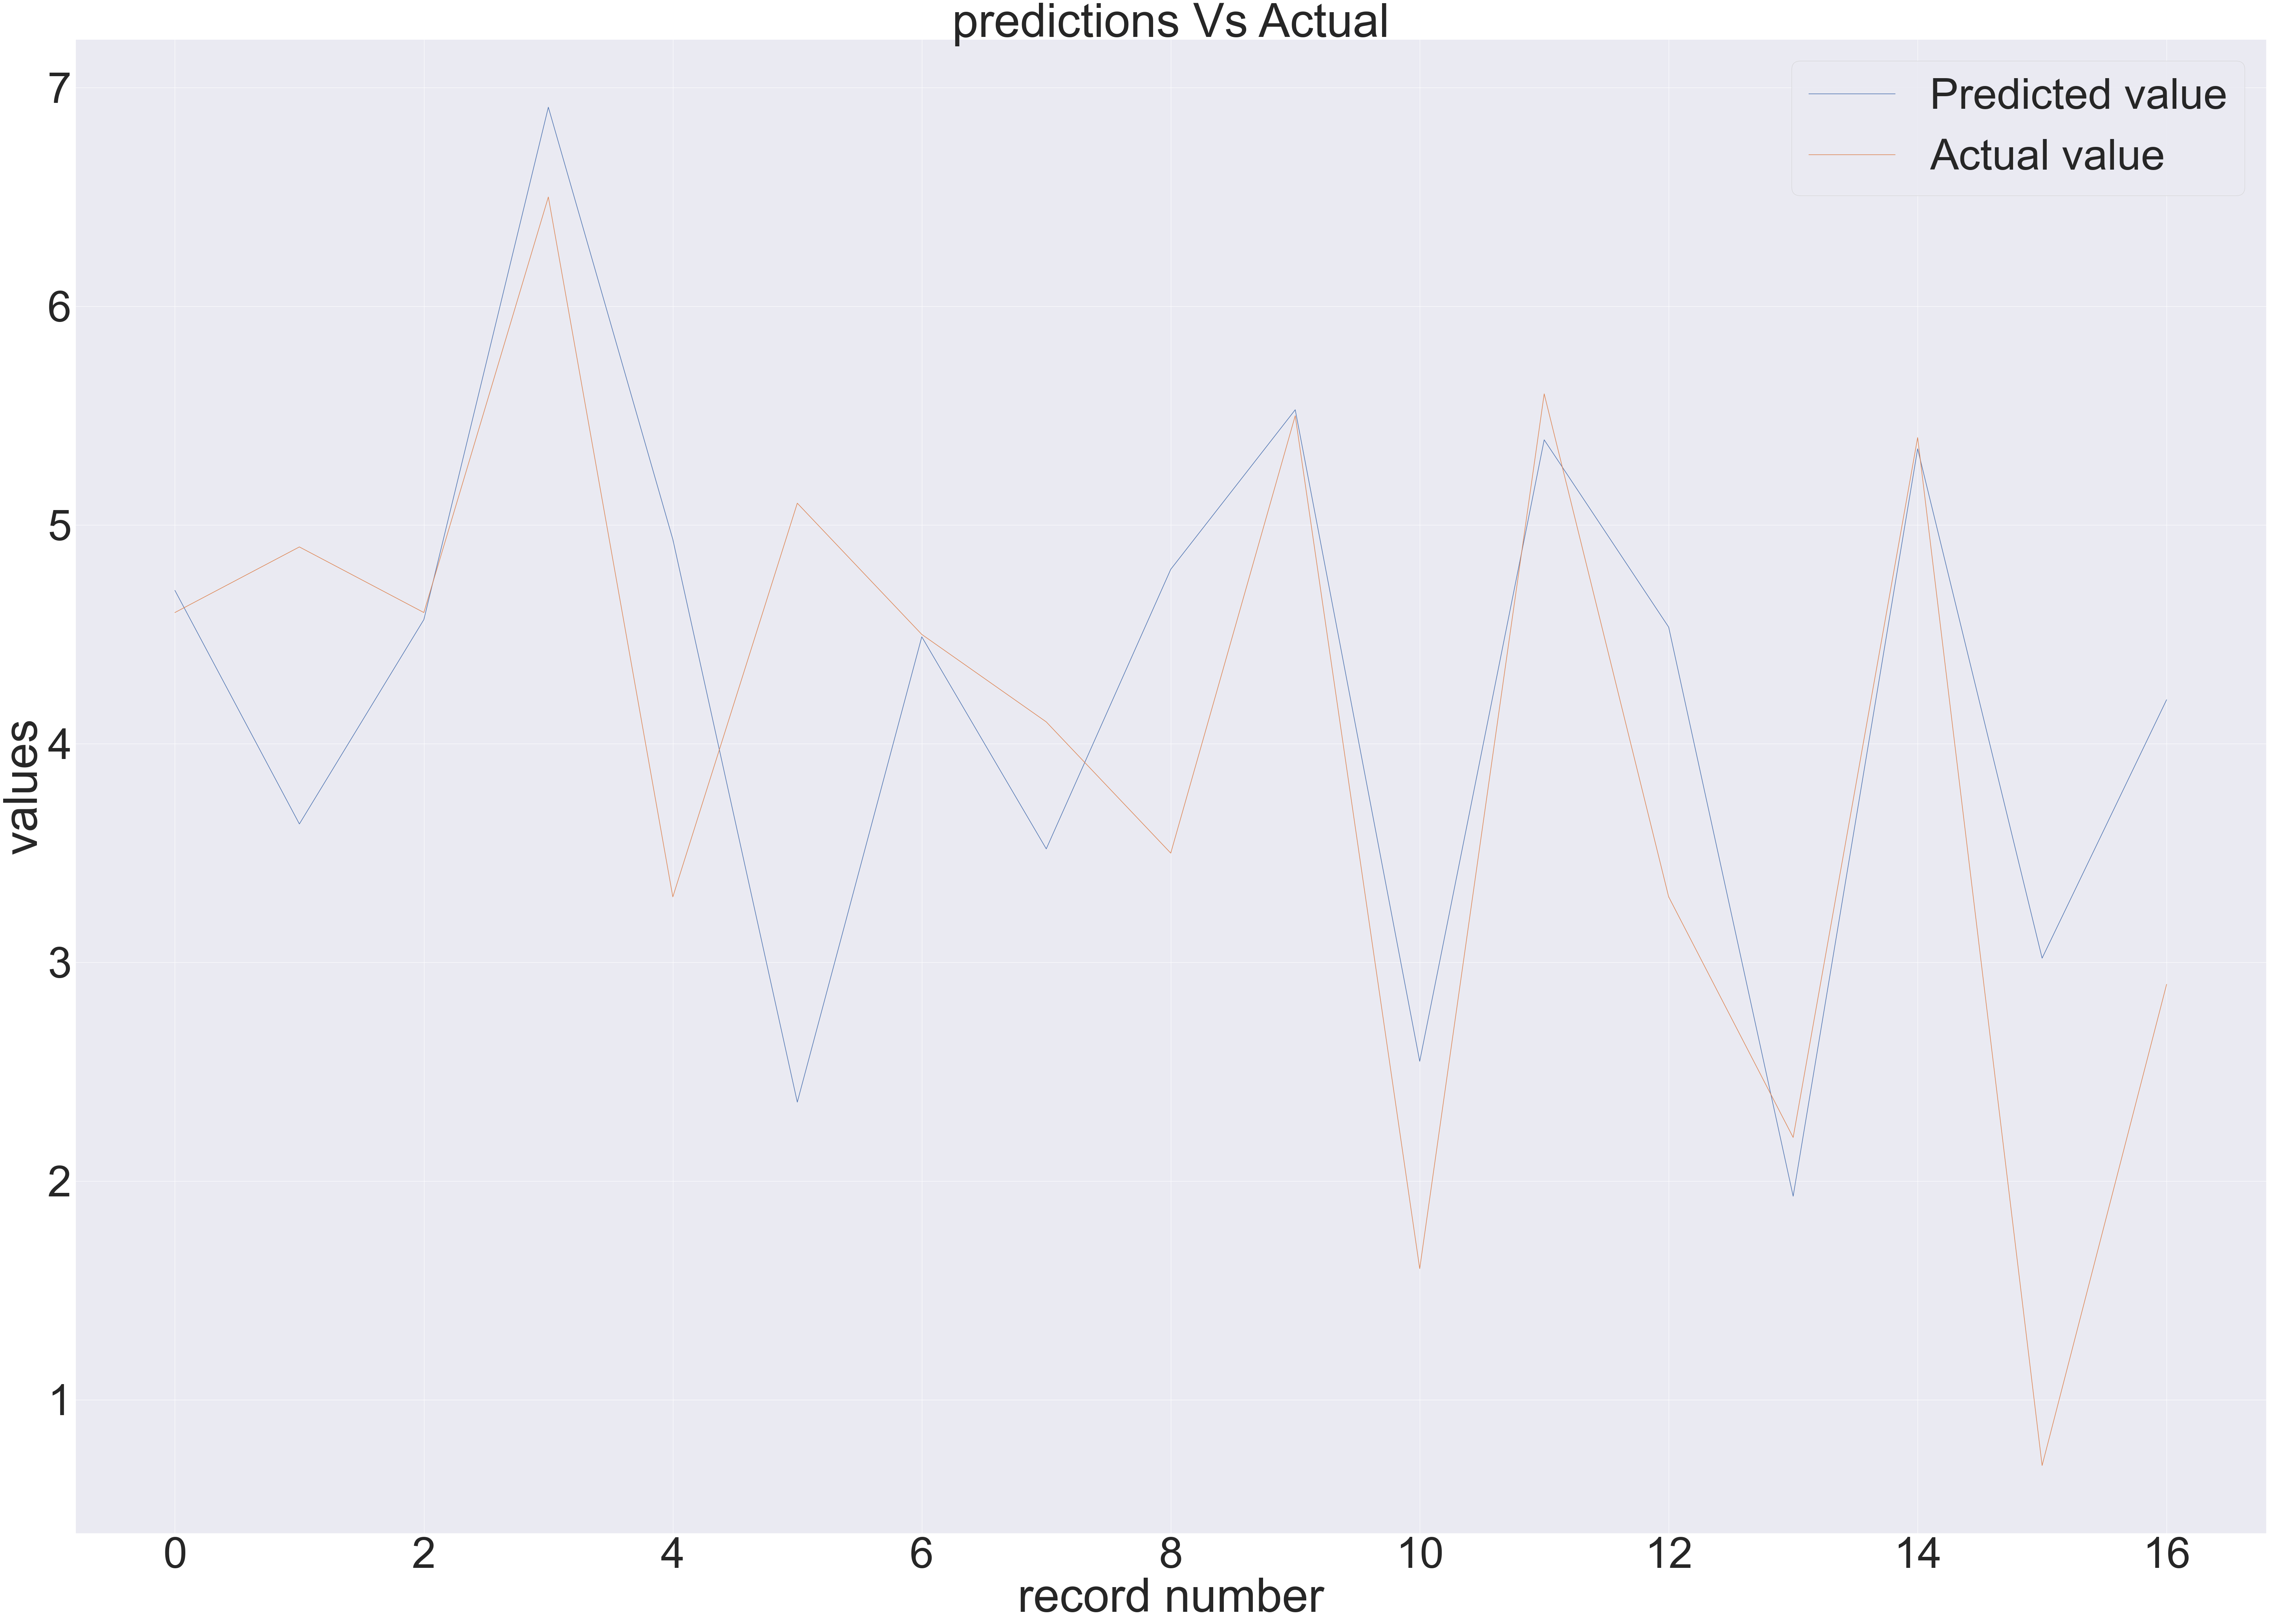

In [105]:
test=pd.DataFrame({'Predicted value':y_pred,'Actual value':y_test_mx})
#fig=plt.figure(figsize=(14,20))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test['Predicted value'])
plt.plot(test['Actual value'])
plt.legend(['Predicted value','Actual value'])
plt.title('predictions Vs Actual')
plt.ylabel('values')
plt.xlabel('record number')
plt.savefig('validation.png',dpi=300)
#plt.savefig('D:\\nile\\Final project\\pic\\evalution\\validation.png',dpi=300)
plt.show()

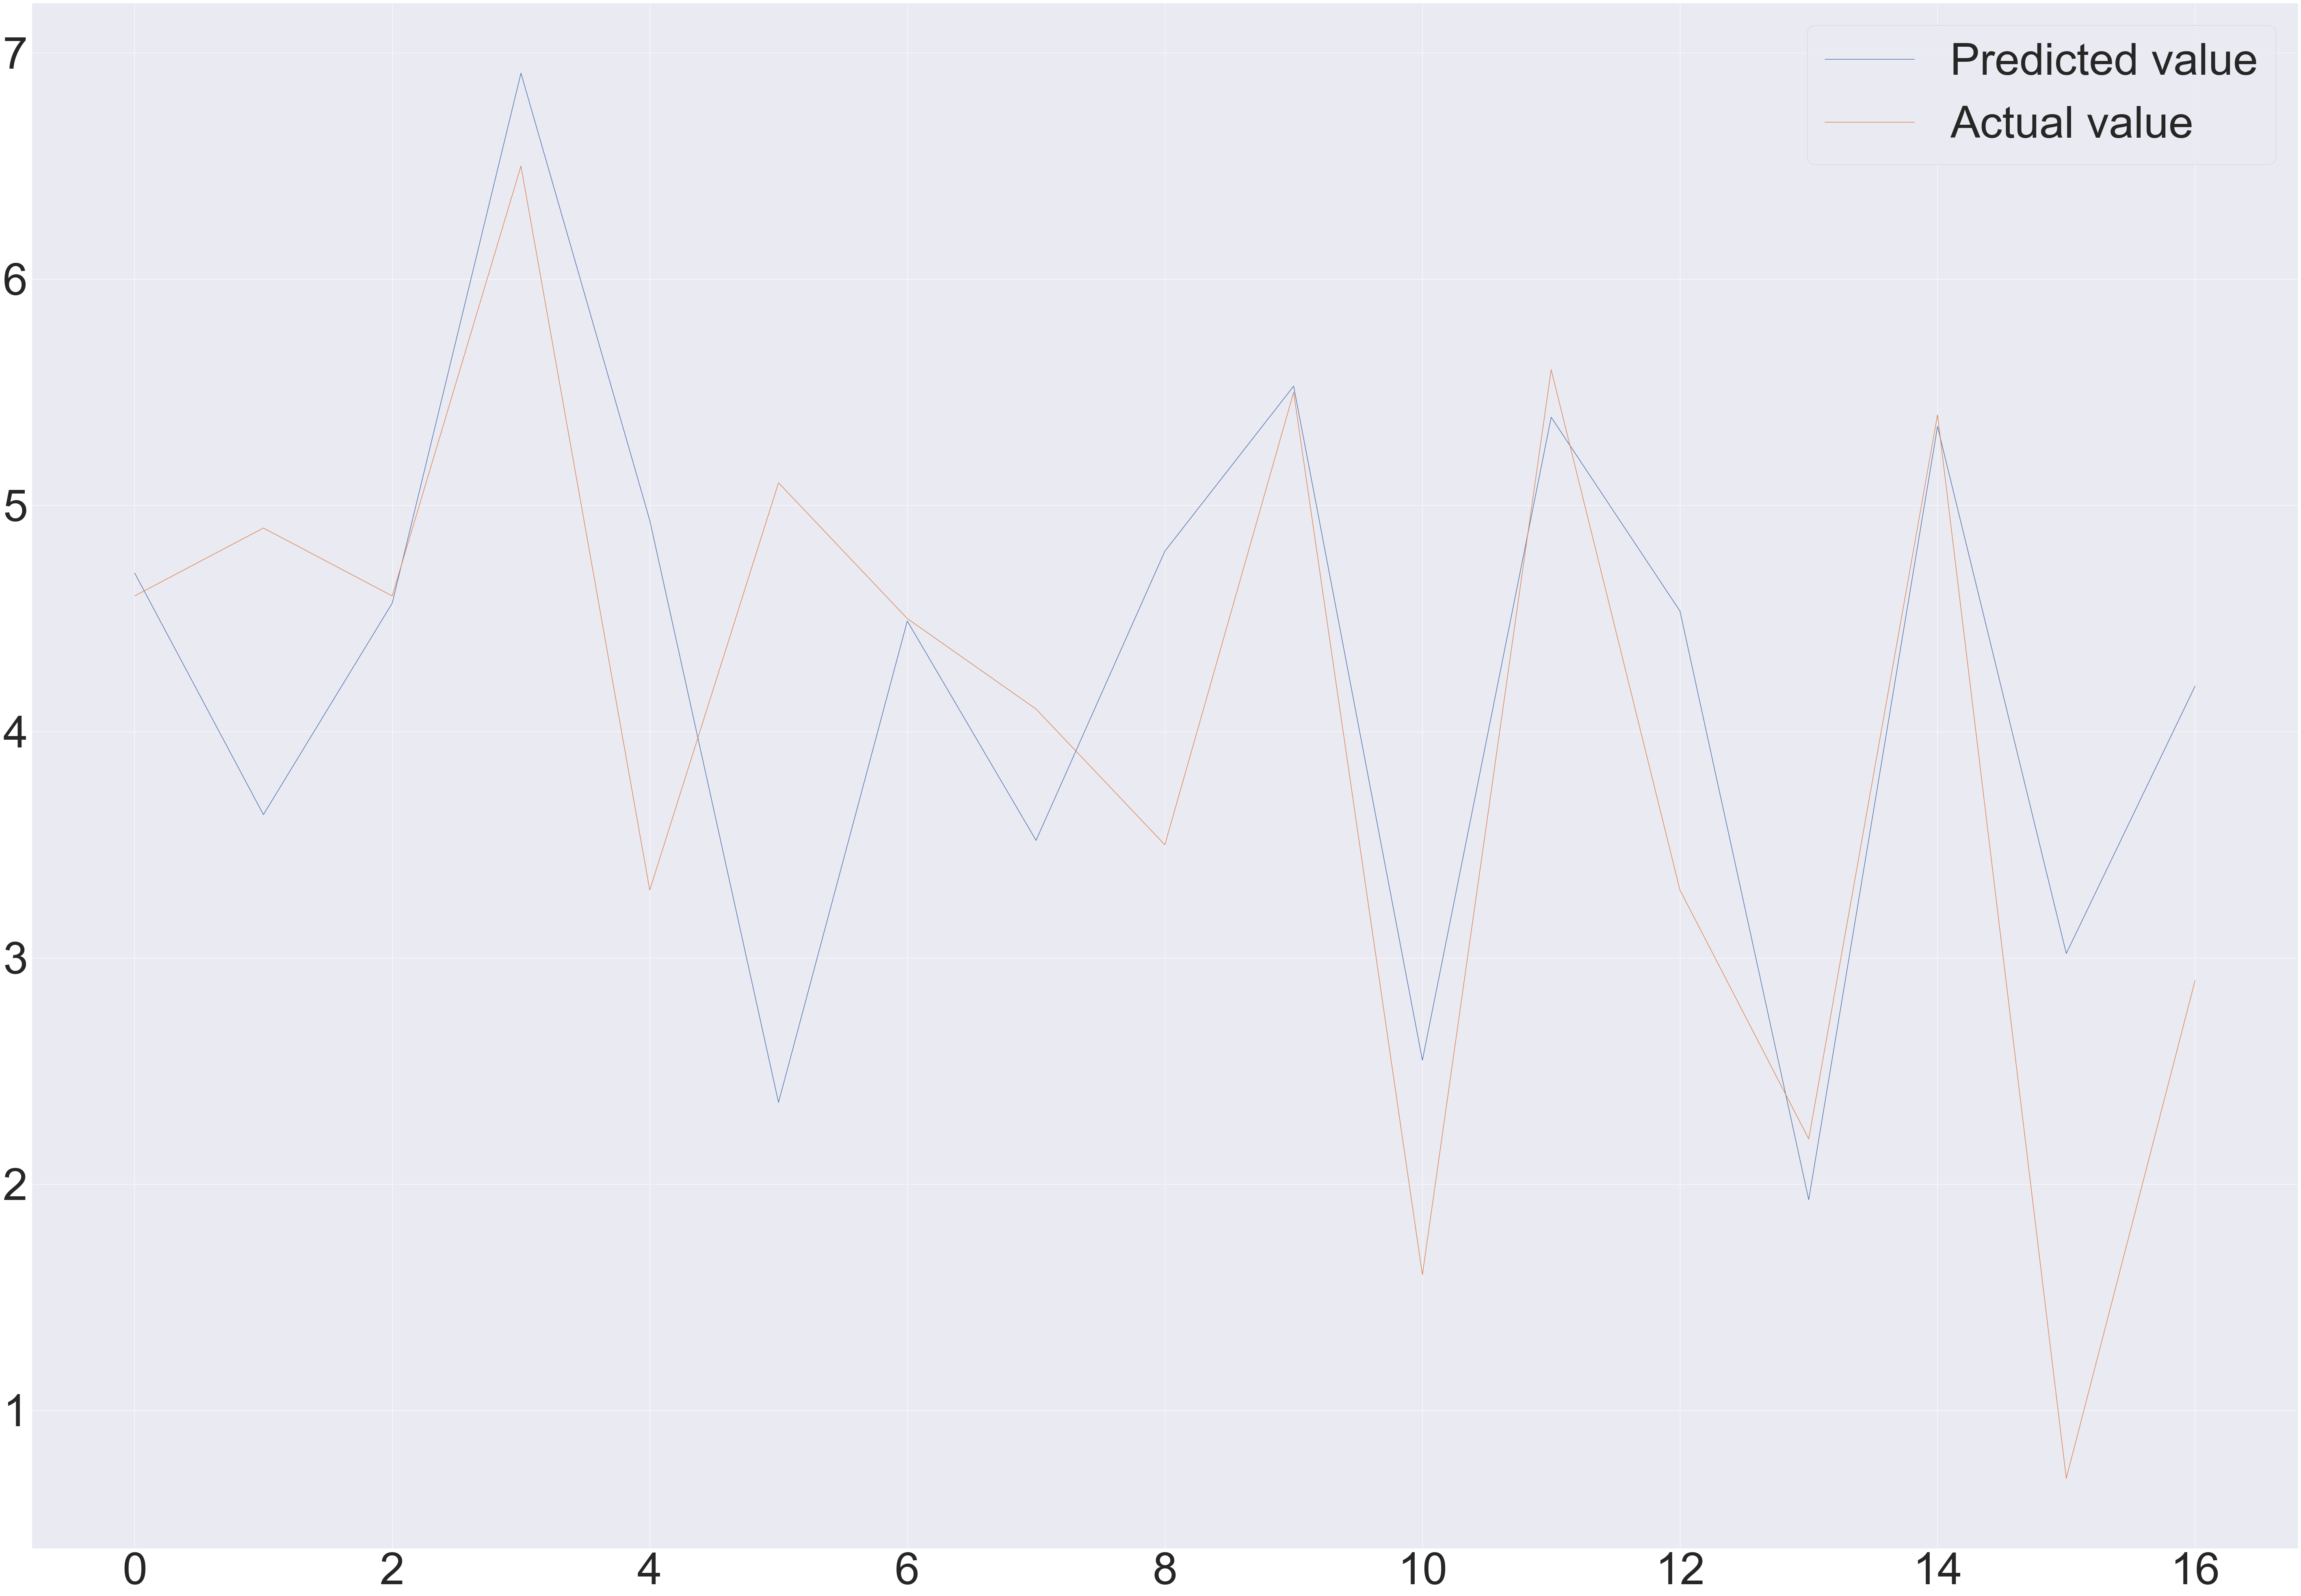

In [106]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test_mx})
#fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:500])
plt.legend(['Predicted value','Actual value'])
plt.savefig('validation.png',dpi=300)
plt.show()